In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return " ".join(words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = pd.read_csv("Places2.csv")


# Example
text = "This is a high-quality leather shoe with a durable sole!"
cleaned_text = preprocess_text(text)
print(cleaned_text)
df['cleaned_desc'] = df['Place_desc'].apply(lambda desc : preprocess_text(desc))

df.head()


high quality leather shoe durable sole


,City,Place,Distance,Place_desc,cleaned_desc
0,Manali,1. Capture the Sceneries of Old Manali,2 km from city center,On the other side of the Manalsu river is a p...,side manalsu river part manali time left behin...
1,Manali,2. Engage in the Adventures of Solang Valley,8 km from city center,Solang Valley is one of the most popular tour...,solang valley one popular tourist destination ...
2,Manali,3. Jogini Waterfall,4 km from city center,Jogini Waterfall is located about 3 kilometre...,jogini waterfall located 3 kilometre away bust...
3,Manali,4. Hadimba Temple,1 km from city center,"Hadimba temple, away from the hustle and bust...",hadimba temple away hustle bustle city life pe...
4,Manali,5. Rohtang Pass,16 km from city center,Rohtang pass is the stretch which connects Ma...,rohtang pas stretch connects manali himachal d...


In [ ]:
model = SentenceTransformer('all-mpnet-base-v2')  # Better than MiniLM
X = model.encode(df['cleaned_desc'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=10, metric='cosine')  # eps = similarity threshold
labels = dbscan.fit_predict(X)



Silhouette Score: 0.032036506


In [ ]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels
labels = kmeans.labels_

labels

array([2, 1, 1, ..., 1, 1, 2], dtype=int32)

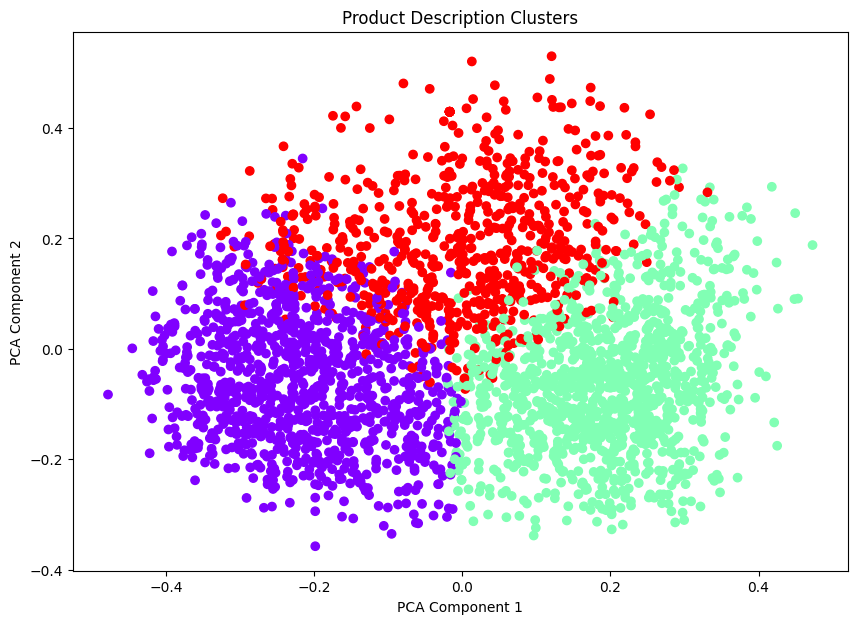

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Convert sparse matrix to dense if using TF-IDF


plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Product Description Clusters")
plt.show()

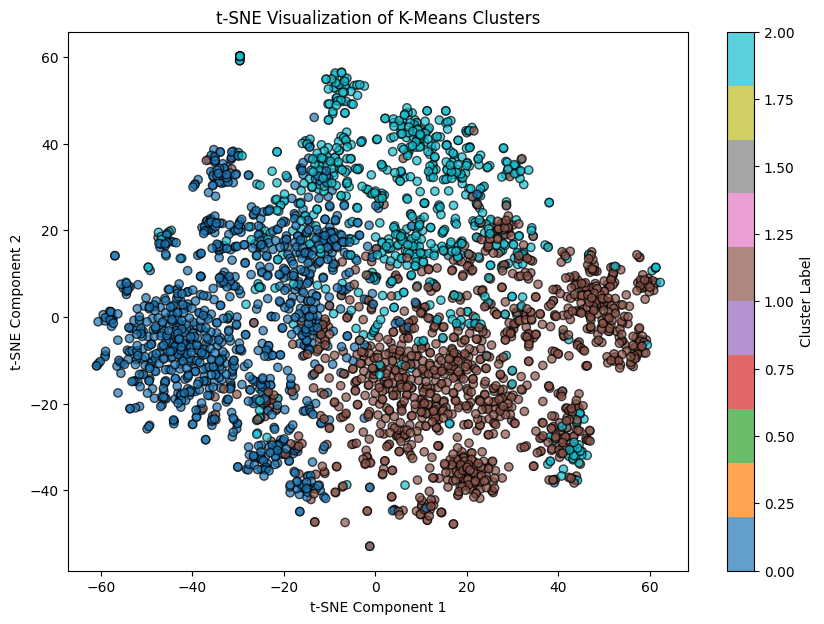

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results with cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', alpha=0.7, edgecolors='k')

# Add cluster labels
plt.colorbar(label="Cluster Label")
plt.title("t-SNE Visualization of K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [ ]:
df['type'] = labels


In [ ]:
df.tail(20)

,City,Place,Distance,Place_desc,cleaned_desc,type
2969,Nahan,15. Giri Nagar,5 km from city center,"Almost 5 km from Dhaula Kuan, Giri Nagar is f...",almost 5 km dhaula kuan giri nagar famous hous...,2
2970,Nahan,16. Jamu Peak,18 km from city center,"Another famous attraction of the town, this p...",another famous attraction town peak offer sple...,1
2971,Nahan,17. Chaugan Road,1 km from city center,Chaugan road serves as one of the best places...,chaugan road serf one best place shop nahan re...,2
2972,Nahan,18. Trilokpur Temple,9 km from city center,Visit this famous temple in Nahan if spiritua...,visit famous temple nahan spirituality always ...,0
2973,Nahan,19. Kangojodi,13 km from city center,Kangojodi is an offbeat destination nestled i...,kangojodi offbeat destination nestled himachal...,1
2974,Nahan,20. Nahan Bada Bazaar,0 km from city center,"The main bazaar area of Nahan, Nahan Bada Baz...",main bazaar area nahan nahan bada bazar shoppe...,2
2975,Lavasa,1. Sightseeing in Lavasa,0 km from city center,There aren't many attractions in Lavasa at th...,many attraction lavasa moment landscape dotted...,1
2976,Lavasa,2. Lakeside Promenade,0 km from city center,Lakeside Promenade is a tourist attraction in...,lakeside promenade tourist attraction privatel...,1
2977,Lavasa,3. Bamboosa,0 km from city center,Bamboosa is a cultural centre in Lavasa highl...,bamboosa cultural centre lavasa highlighting i...,2
2978,Lavasa,4. Temghar Dam,0 km from city center,Temghar Dam is a massive dam built on the riv...,temghar dam massive dam built river muthu 40 k...,1


# After K-means clustering
We get 3 clusters based on the descpritions of places.
1. Temples
2. Monuments, Roads etc
3. Natural scenery

In [ ]:
df1 = pd.read_csv("Types.csv")

df1.rename(columns={"POIs":"Place"},inplace= True)

df1

,PID,Place,PRIORITY_1,PRIORITY_2,PRIORITY_3,PRIORITY_4,PRIORITY_5
0,POI1,AMBER PALACE,History and Culture,Museum,Local Experiences,Scenic,Adventure
1,POI2,CITY PALACE JAIPUR,History and Culture,Museum,Local Experiences,Scenic,Food and Drinks
2,POI3,JANTAR MANTAR JAIPUR,History and Culture,Museum,-,-,-
3,POI4,HAWA MAHAL,History and Culture,-,Local Experiences,Scenic,-
4,POI5,ALBERT HALL MUSEUM (CENTRAL MUSEUM),Museum,History and Culture,Scenic,-,-
...,...,...,...,...,...,...,...
66,POI67,SUNRISE DREAM WORLD AMUSEMENT PARK,Adventure,-,-,-,-
67,POI68,BRETHREN CHURCH JAIPUR,Religious,-,-,Shows and Concerts,-
68,POI69,MI ROAD,Shopping,Food and Drinks,-,-,-
69,POI70,BHANGARH FORT,Adventure,Scenic,Religious,-,-


In [ ]:
df['Place'] = df['Place'].str.replace(r'^\d+\.\s*', '', regex=True).str.upper()
df['Place']


,Place
0,1. CAPTURE THE SCENERIES OF OLD MANALI
1,2. ENGAGE IN THE ADVENTURES OF SOLANG VALLEY
2,3. JOGINI WATERFALL
3,4. HADIMBA TEMPLE
4,5. ROHTANG PASS
...,...
2984,5. THE FISHING VILLAGE
2985,6. CRUISES
2986,7. KOVALAM BEACH
2987,8. BOAT RACE


In [ ]:
import pandas as pd

# Sample DataFrame
df2 = pd.DataFrame({'Place': ['16. Jamu Peak', '20. Jayanagar', '8. MG Road', '100. Whitefield']})



# Display the result
print(df['Place'])
df['Place'].apply(repr)
# Correct regex to remove the full number, dot, and spaces
df['Place'] = df['Place'].str.strip().str.replace(r'^\d+\.\s*', '', regex=True).str.upper()
df['Place']

0              1. CAPTURE THE SCENERIES OF OLD MANALI 
1        2. ENGAGE IN THE ADVENTURES OF SOLANG VALLEY 
2                                 3. JOGINI WATERFALL 
3                                   4. HADIMBA TEMPLE 
4                                     5. ROHTANG PASS 
                             ...                      
2984                           5. THE FISHING VILLAGE 
2985                                       6. CRUISES 
2986                                 7. KOVALAM BEACH 
2987                                     8. BOAT RACE 
2988                                      9. AYURVEDA 
Name: Place, Length: 2989, dtype: object


,Place
0,CAPTURE THE SCENERIES OF OLD MANALI
1,ENGAGE IN THE ADVENTURES OF SOLANG VALLEY
2,JOGINI WATERFALL
3,HADIMBA TEMPLE
4,ROHTANG PASS
...,...
2984,THE FISHING VILLAGE
2985,CRUISES
2986,KOVALAM BEACH
2987,BOAT RACE


In [ ]:
merged_df = df.merge(df1, on='Place', how='left')
merged_df.drop('PID', axis=1, inplace=True)
merged_df[merged_df['PRIORITY_1'].notnull()].count()

,0
City,9
Place,9
Distance,9
Place_desc,9
cleaned_desc,9
type,9
PRIORITY_1,9
PRIORITY_2,9
PRIORITY_3,9
PRIORITY_4,9


In [ ]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/

In [ ]:
!pip install kaggle


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!unzip "archive.zip"


Archive:  archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of archive.zip or
        archive.zip.zip, and cannot find archive.zip.ZIP, period.


In [ ]:
df2 = pd.read_csv("Review_db.csv")

In [ ]:
df2.drop('Date', axis=1, inplace= True)

In [ ]:
df2.columns

Index(['City', 'Place', 'Review', 'Rating', 'Name', 'Raw_Review'], dtype='object')

In [ ]:
df2.groupby('Rating')

In [ ]:
average_ratings = df2.groupby('Place')['Rating'].count()


average_ratings

,Rating
Place,
1 MG Lido Mall,107
10 Acres Mall,5
1008 Lingam Temple,90
101 Ft. Hanuman Idol,4
108 Feet Height Statue Of Basaveshwara,10
...,...
osian camel and jeep safari,33
shree jayadurgaparameshwari Temple,1
tour2sundarban,1
